# Title : Analyzing Weather Data from OpenWeatherMap API

In [18]:
import requests 
import pandas as pd 
import datetime
# requests: Library for sending HTTP requests to access the weather data.
# pandas: Library for data manipulation and analysis.
# datetime: Module for handling dates and times.

In [2]:
# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e' 
# Set the location for which you want to retrieve weather data 
lat = 18.184135
lon = 74.610764
# api_key: Your unique API key to access OpenWeatherMap's data.
# lat and lon: Latitude and longitude of the location for which weather data will be retrieved.


In [4]:
# https://openweathermap.org/api/one-call-3
# how	How to use api call 
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"
#Constructs the API endpoint URL by inserting latitude, longitude, and API key into the URL template.

In [5]:
# Send a GET request to the API 
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']
# Sends a GET request to OpenWeatherMap API to fetch weather data for the specified location.
# weather_data stores the JSON response from the API in dictionary format.
# weather_data.keys(): Lists the main keys in the JSON data.
# len(weather_data['list']): Shows the number of forecasted entries.
# weather_data['list'][0]['weather'][0]['description']: Displays the weather description for the first forecast entry.


'clear sky'

In [6]:
# Getting the data from dictionary and taking into one variable 
# Extract relevant weather attributes using list comprehension
temperatures = [item['main']['temp'] for item in weather_data['list']] 

# It will extract all values (40) and putting into one variable
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

# This code uses list comprehensions to extract key attributes from each forecast in weather_data['list'].
# temperatures: List of temperatures.
# timestamps: List of timestamps, converted from UNIX time to a readable datetime format.
# temperature, humidity, wind_speed, and weather_description: Lists of respective weather attributes.

In [7]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures, 
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})
# Combines all extracted lists into a pandas DataFrame, making the data easier to work with.

In [8]:
# Set the Timestamp column as the DataFrame's index
weather_df.set_index('Timestamp', inplace=True)
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")
# Sets the Timestamp column as the index for the DataFrame to facilitate time-based operations.
# Finds the highest and lowest temperatures in the dataset and prints them.

Maximum Temperature - 304.82
Minimum Temperature - 292.05


In [9]:
# Clean and preprocess the data # Handling missing values
weather_df.fillna(0, inplace=True) # Replace missing values with 0 or appropriate value



In [10]:
# Handling inconsistent format (if applicable)
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)
# Replaces any missing values with 0.
# Converts temperature from Kelvin to Celsius by applying a lambda function.

In [19]:
# Convert temperature from Kelvin to Celsius
# Print the cleaned and preprocessed data print(weather_df)
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-11 03:00:00        20.89        51        2.12           clear sky
2024-11-11 06:00:00        25.47        38        4.08           clear sky
2024-11-11 09:00:00        30.75        25        3.86           clear sky
2024-11-11 12:00:00        28.26        31        4.19           clear sky
2024-11-11 15:00:00        23.96        38        3.94       broken clouds
2024-11-11 18:00:00        22.10        46        2.97       broken clouds
2024-11-11 21:00:00        20.61        53        2.52     overcast clouds
2024-11-12 00:00:00        18.90        63        1.87     overcast clouds
2024-11-12 03:00:00        22.86        51        1.82       broken clouds
2024-11-12 06:00:00        28.27        33        4.06       broken clouds
2024-11-12 09:00:00        30.41        25        3.27       broken clouds
2024-11-12 12:00:00      

In [12]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()
# Resamples the data by day and calculates the daily average for temperature, humidity, and wind speed.

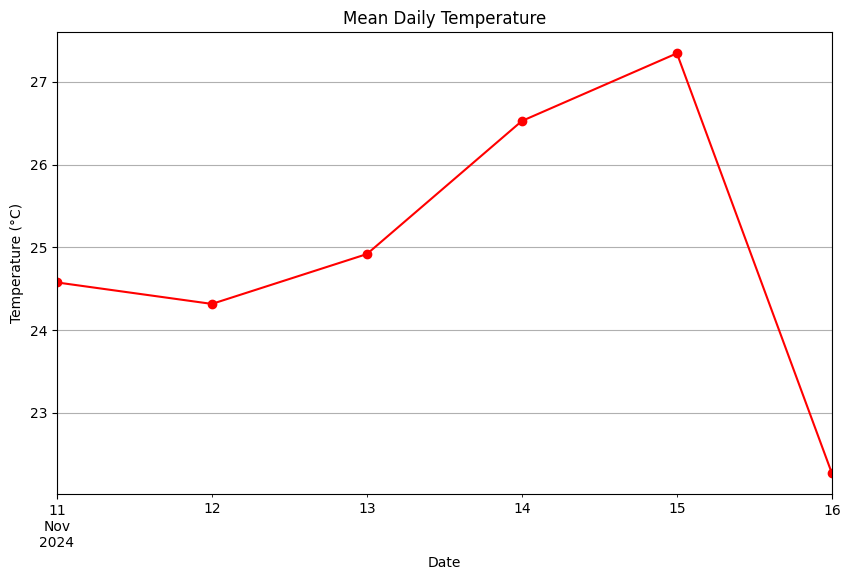

In [13]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

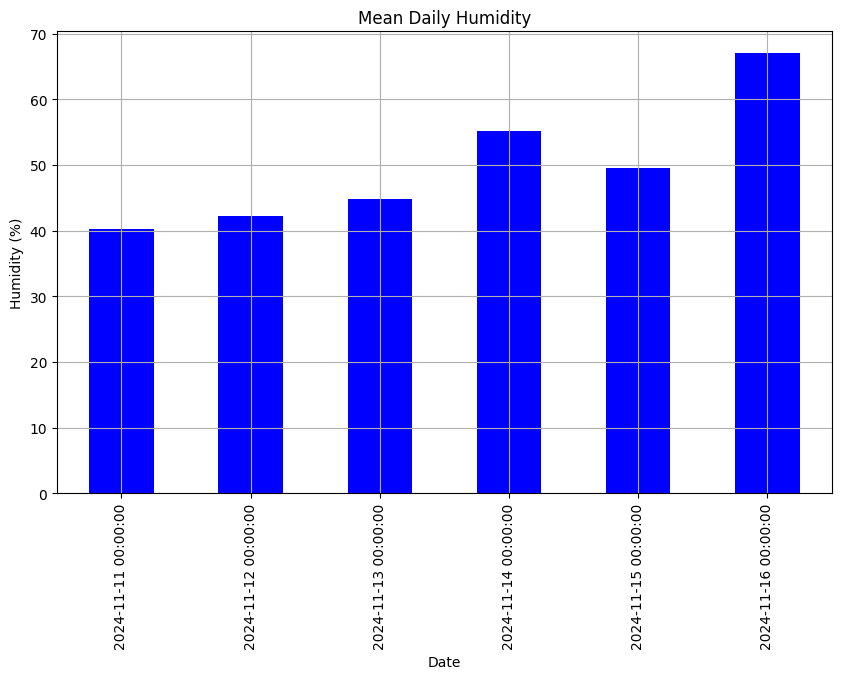

In [14]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

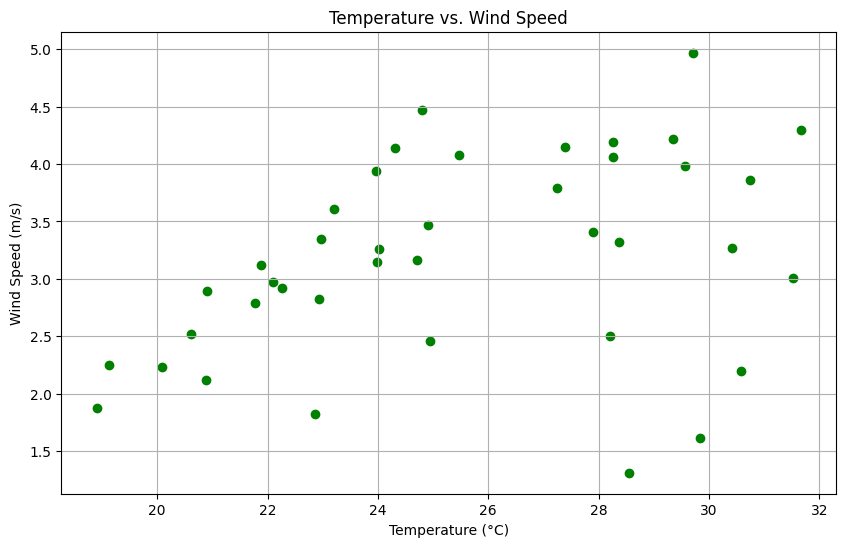

In [15]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

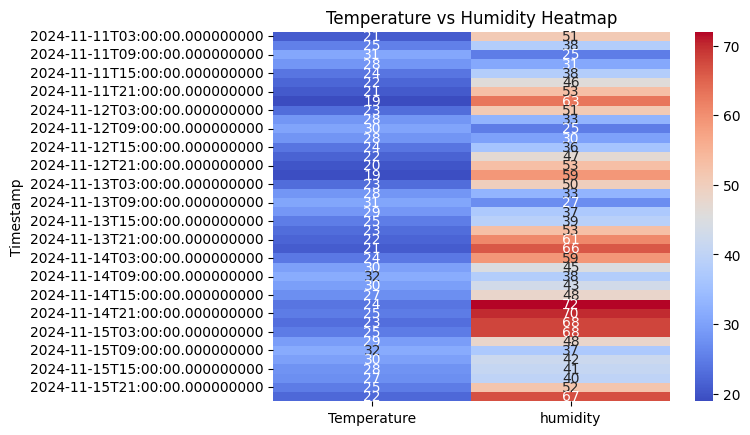

In [16]:
# Heatmap
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

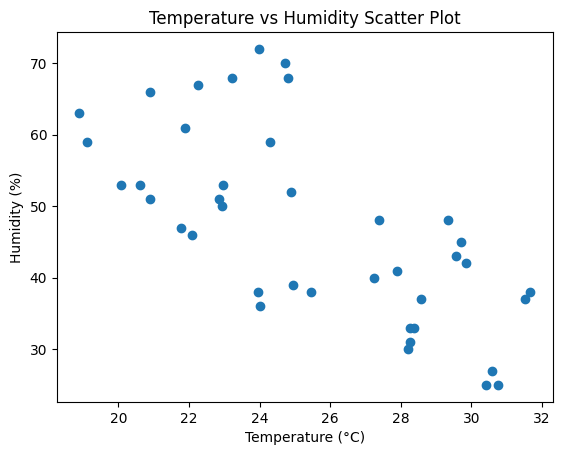

In [17]:
# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

In [ ]:
# This code retrieves weather data, structures it, cleans it, and then visualizes relationships and trends. Each plot helps in understanding various aspects of the weather data, such as how temperature varies daily, how it relates to humidity and wind speed, and how temperature and humidity are correlated.

In [ ]:
# ### Concept: Analyzing Weather Data Using the OpenWeatherMap API

# #### What It Is
# This concept is about retrieving weather data (like temperature, humidity, wind speed, and conditions) for a specific location using the OpenWeatherMap API. We then process this data to analyze patterns and trends, like daily temperature changes or the relationship between humidity and temperature.

# #### How It Works
# 1. **Getting Weather Data**: The OpenWeatherMap API is accessed using a unique API key. By providing latitude and longitude coordinates of a location, we can retrieve up-to-date weather forecasts for that area.

# 2. **Processing the Data**:
#    - The API returns data in a JSON format with various weather attributes.
#    - We extract specific details, like temperature and humidity, using Python's `requests` library to make the API call, and `pandas` for organizing the data in a table format.

# 3. **Data Cleaning and Transformation**:
#    - Data may need cleaning, like handling any missing values.
#    - Temperatures are converted from Kelvin to Celsius, so they are easier to interpret.

# 4. **Data Analysis and Visualization**:
#    - We calculate averages for each day and then visualize them. Graphs help to spot patterns, such as daily temperature trends or how temperature and humidity are related.
#    - Visualization libraries like `matplotlib` and `seaborn` are used to create line graphs, bar charts, and scatter plots to make data interpretation easier.

# #### Real-Time Applications
# - **Weather Forecasting**: Real-time weather data can help in forecasting future weather conditions for an area.
# - **Agriculture**: Farmers can use this data to plan irrigation and harvesting based on temperature and rainfall forecasts.
# - **Logistics**: Shipping companies can avoid delays by checking real-time weather data for routes.
# - **Energy**: Power companies use weather data to manage the supply of energy based on heating or cooling demands.
# - **Smart Cities**: Urban planners and city services can make decisions based on weather data, like adjusting public transport schedules in extreme weather.

# This concept demonstrates how easy it can be to work with live weather data and use it for decision-making in various real-world scenarios.